# AdaBoost (Adaptive Boosting)
### Modify the AdaBoost scratch code in our lecture such that:
- Notice that if err = 0, then $\alpha$ will be undefined, thus attempt to fix this by adding some very small value to the lower term
- Notice that sklearn version of AdaBoost has a parameter learning_rate. This is in fact the $\frac{1}{2}$ in front of the $\alpha$ calculation. Attempt to change this $\frac{1}{2}$ into a parameter called eta, and try different values of it and see whether accuracy is improved. Note that sklearn default this value to 1.
- Observe that we are actually using sklearn DecisionTreeClassifier. If we take a look at it closely, it is actually using weighted gini index, instead of weighted errors that we learn above. Attempt to write your own class of class Stump that actually uses weighted errors, instead of weighted gini index. To check whether your stump really works, it should give you still relatively the same accuracy. In addition, if you do not change y to -1, it will result in very bad accuracy. Unlike sklearn version of DecisionTree, it will STILL work even y is not change to -1 since it uses gini index
- Put everything into a class

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=500, random_state=1)
y = np.where(y==0,-1,1)  #change our y to be -1 if it is 0, otherwise 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

m = X_train.shape[0]
S = 20
stump_params = {'max_depth': 1, 'max_leaf_nodes': 2}
models = [DecisionTreeClassifier(**stump_params) for _ in range(S)]

#initially, we set our weight to 1/m
W = np.full(m, 1/m)

#keep collection of a_j
a_js = np.zeros(S)

for j, model in enumerate(models):
    
    #train weak learner
    model.fit(X_train, y_train, sample_weight = W)
    
    #compute the errors
    yhat = model.predict(X_train) 
    err = W[(yhat != y_train)].sum()
        
    #compute the predictor weight a_j
    #if predictor is doing well, a_j will be big
    a_j = np.log ((1 - err) / err) / 2
    a_js[j] = a_j
    
    #update sample weight; divide sum of W to normalize
    W = (W * np.exp(-a_j * y_train * yhat)) 
    W = W / sum (W)
    
    print(j , err, a_j)
        
#make weighted predictions
Hx = 0
for i, model in enumerate(models):
    yhat = model.predict(X_test)
    Hx += a_js[i] * yhat
    
yhat = np.sign(Hx)

print(classification_report(y_test, yhat))

0 0.05142857142857143 1.457381605510162
1 0.2744310575635866 0.4861280111506217
2 0.3735369228692279 0.25853649067790896
3 0.24459078334310394 0.5638365346081023
4 0.28024270054897804 0.471629027844006
5 0.361214355297757 0.28504868984885495
6 0.3862669067140282 0.231515766733248
7 0.33098597665868745 0.35186450683261894
8 0.3271644484062004 0.36051900185192004
9 0.34760257450595344 0.31479706232431687
10 0.3228912787325592 0.370258092261616
11 0.3147218946203221 0.3890676872414111
12 0.3185198801302447 0.3802910942589498
13 0.35149144323035836 0.30624491550448785
14 0.27941500600345126 0.47368261022035557
15 0.3171503701461901 0.3834493294414805
16 0.31209720736718777 0.3951664184073478
17 0.3069237308209477 0.40727038337756866
18 0.35753653579435773 0.2930361975822687
19 0.3093663548459018 0.40154165674894005
              precision    recall  f1-score   support

          -1       0.96      0.97      0.97        79
           1       0.97      0.96      0.96        71

    accuracy 

In [4]:
#make weighted predictions
Hx = 0
for i, model in enumerate(models):
    yhat = model.predict(X_test)
    Hx += a_js[i] * yhat
yhat = np.sign(Hx)

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97        79
           1       0.97      0.96      0.96        71

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



---
# Put Everything into Class

In [5]:
class Stump():
    def __init__(self):
        # Determines whether threshold should be evaluated as < or >
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        # Voting power of the stump
        self.alpha = None

In [6]:
np.full(shape = (3,2), fill_value= (1,2))

array([[1, 2],
       [1, 2],
       [1, 2]])

In [7]:
class Adaboost:


    def __init__(self, numClassifier, eta = 0.5):
        self.numClassifier = numClassifier
        self.eta = eta



    def fit(self, X, y):

        m, n = X.shape
        W = np.full(shape = m , fill_value=  1/m )


        self.classifiers = []


        for i in range(self.numClassifier):

            clf = Stump()


            #set initially minimum error to infinity
            #so at least the first stump is identified
            min_err = np.inf


            for feature in range(n):
                feature_value = np.sort(np.unique(X[:, feature]))
                thresholds = (feature_value[:-1] + feature_value[1:]) / 2
                # print(i , feature, len(feature_value), len(thresholds))
                assert len(thresholds) == len(feature_value) - 1 , 'threshold number must be feature_value -1'


                for threshold in thresholds:
                    for polarity in [1, -1]:
                        yhat = np.ones(len(y))
                        yhat[polarity * X[:, feature] < polarity * threshold] = -1  #polarity=1 rule
                        error = W[(yhat != y)].sum()

                

                        # print(polarity, error)

                        #save the best stump
                        if error < min_err:
                            clf.polarity = polarity
                            clf.threshold = threshold
                            clf.feature_index = feature
                            min_err = error

                            # print(clf.feature_index, clf.threshold, clf.polarity, min_err)

            print(clf.feature_index, clf.threshold, clf.polarity, min_err)
            #once we know which is the best stump
            #we calculate its alpha, and reweight samples
            eps = 1e-10 #to prevent division by zero
            clf.alpha = self.eta * (np.log ((1 - error) / (error + eps))) # error + eps to avoid 0 as denominator
            W = W * np.exp(-clf.alpha * y * yhat) 
            W = W / np.sum(W)
     
            print(clf.alpha)
            self.classifiers.append(clf)


    
    
    def predict(self, X):
        m, n = X.shape
        yhat = np.zeros(m)
        for clf in self.classifiers:
            pred = np.ones(m) #set all to 1
            pred[clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold] = -1  #polarity=1 rule
            print(clf.alpha)

            yhat += clf.alpha * pred

            # print(yhat)

        return np.sign(yhat)

            



In [8]:
test = Adaboost(numClassifier= 5, eta = 0.5)

In [9]:
X.shape

(500, 20)

In [10]:
test.fit(X_train,y_train)

4 0.06187989795417792 1 0.05142857142857143
0.034299158067825825
4 0.06187989795417792 1 0.0514890973877671
3.550271188133721e-12
4 0.06187989795417792 1 0.05148909738777338
2.2204460492503126e-16
4 0.06187989795417792 1 0.05148909738777338
2.2204460492503126e-16
4 0.06187989795417792 1 0.05148909738777339
-6.661338147750944e-16


In [11]:
test.predict(X_test)

0.034299158067825825
3.550271188133721e-12
2.2204460492503126e-16
2.2204460492503126e-16
-6.661338147750944e-16


array([-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,
        1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,
        1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1.,  1.])

In [12]:
y_hat = test.predict(X_test)

0.034299158067825825
3.550271188133721e-12
2.2204460492503126e-16
2.2204460492503126e-16
-6.661338147750944e-16


In [13]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(y_true = y_test, y_pred = yhat))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97        79
           1       0.97      0.96      0.96        71

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [15]:
y_test

array([-1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
        1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1])

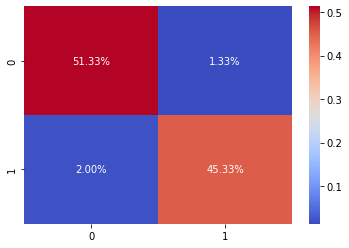

In [16]:
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = yhat) / len(y_test), annot = True, cmap = 'coolwarm', fmt = '.2%')

--- 
## SUMMARY
- Adaboost with adjustable eta at 0.5 and 5 classifier gives the accuracy score at 97%